In [1]:
import tensorflow as tf
import tf_emddistance
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display

/home/marcus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Generate 100 circles with radii in the range [0, 10)
num_samples = 500
radii = np.arange(0, 10, 0.1)
num_clouds = len(radii)
S = np.zeros((num_clouds, num_samples, 3)) # Cricles -> [100, 500, 3]
for i, r in enumerate(radii):
    # Sample the circumference
    for j in range(num_samples):
        S[i, j, 0] = np.cos(2*np.pi * j / num_samples) * r
        S[i, j, 1] = np.sin(2*np.pi * j / num_samples) * r
        S[i, j, 2] = 0 
S_feed = S

In [3]:
tf.reset_default_graph()

# Variable X -> [500, 3]
# Point cloud with which to minimize the EMD distance to
X = tf.get_variable("X", initializer=tf.random_normal((num_samples, 3), stddev=1.0))

# Stack X into 100 replicas -> [100, 500, 3]
X_stacked = tf.stack([X for _ in range(num_clouds)]) 

# Placeholder for input point clouds -> [100, 500, 3]
S = tf.placeholder(tf.float32, [num_clouds, num_samples, 3])

# Calculate EMD distance
dist, idx1, idx2 = tf_emddistance.emd_distance(X_stacked, S)

# The loss will be the average of all the distances of the points
loss = tf.reduce_mean(dist)

emd


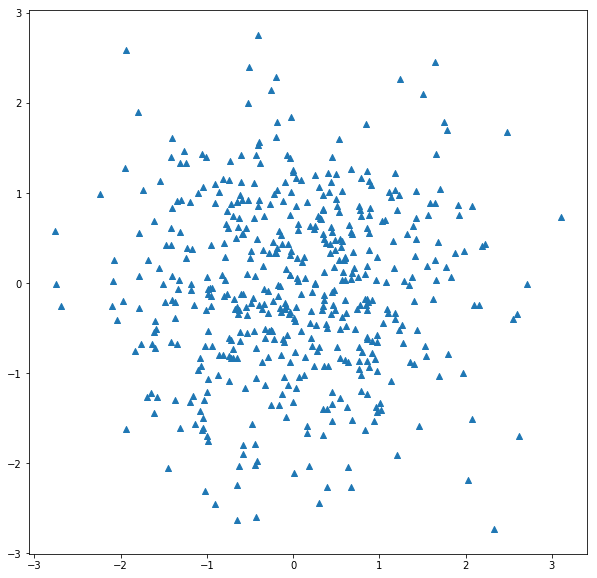

In [4]:
def visualize(X):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], marker='^', c="C0")
    plt.show()

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
visualize(sess.run(X))

In [5]:
# Define optimizer
optim = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
tf.global_variables_initializer().run()

# Minimize the loss
num_iter = 100
loss_values = []
progress = FloatProgress(min=0, max=num_iter); display(progress)
for i in range(num_iter):
    progress.description = "Epoch %i/%i" % (i, num_iter)
    _, l = sess.run([optim, loss], feed_dict = { S: S_feed })
    loss_values.append(l)
    progress.value += 1

A Jupyter Widget

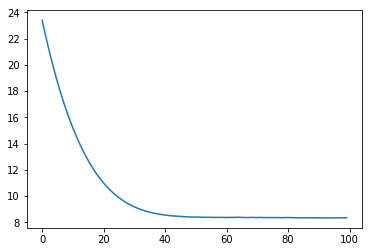

In [6]:
plt.plot(loss_values)
plt.show()

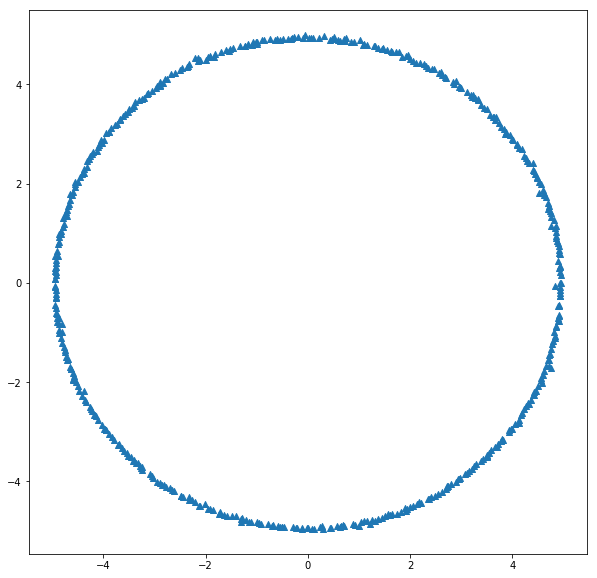

In [7]:
visualize(sess.run(X))